
# **Introduction**

Finding a job online has become the norm, but many job seekers, especially those unemployed, face a big
risk of fake job postings. Scammers create these fake listings to steal personal information, trick people
into paying fees, or even involve them in illegal activities. Many job seekers, desperate for work, may not
realize a job posting is fake until it’s too late.

This project aims to help by building a model that can detect fake job postings. By analyzing job
descriptions, company profile, and other factors, the model can classify as real or fake job post. This will
protect job seekers from scams and make online job searching safer and more reliable.

# **Main goal:**


##The project’s goal is to protect job seekers by using Machine Learning to detect fake job postings.

# **Data Gathering and Exploring**

In [ ]:
# Import Libraries
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import re
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, RNN, Dense, Dropout, Bidirectional, SimpleRNN, SpatialDropout1D
from transformers import BertTokenizer, TFBertModel
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from imblearn.over_sampling import RandomOverSampler


# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:




import kagglehub
import pandas as pd
import os

# Download the dataset
dataset_path = kagglehub.dataset_download("shivamb/real-or-fake-fake-jobposting-prediction")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break  # Stop searching after finding the first CSV file

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Print the path to the downloaded file if needed
print("Path to dataset files:", csv_file_path)

,Downloading from https://www.kaggle.com/api/v1/datasets/download/shivamb/real-or-fake-fake-jobposting-prediction?dataset_version_number=1...


100%|██████████| 16.1M/16.1M [00:00<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/real-or-fake-fake-jobposting-prediction/versions/1/fake_job_postings.csv


#**preprocessing**

In [ ]:
# Get the dimensions of the Dataset
print("Dimensions of the Dataset (Rows, Columns):")
df.shape

Dimensions of the Dataset (Rows, Columns):


(17880, 18)

In [ ]:
# Display the Initial rows in dataset
print("Initial rows in in dataset:")
df.head()

Initial rows in in dataset:


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


####Drop job_id, it's useless:

In [ ]:
df.drop('job_id', axis=1, inplace=True)

In [ ]:
# make sure the job_id deleted
print("The job_id deleted")
df.head()

The job_id deleted


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


###Removes unwanted spaces in column names:

In [ ]:
# Removing any leading, and trailing whitespaces in columns
df.columns = df.columns.str.strip()

###Lists all columns, types (string, int), and missing values:

In [ ]:
# Getting an overview of the features and their types in the dataset
print("Overview of the features and their types:")
df.info()

Overview of the features and their types:
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 17880 entries, 0 to 17879
,Data columns (total 17 columns):
, #   Column               Non-Null Count  Dtype 
,---  ------               --------------  ----- 
, 0   title                17880 non-null  object
, 1   location             17534 non-null  object
, 2   department           6333 non-null   object
, 3   salary_range         2868 non-null   object
, 4   company_profile      14572 non-null  object
, 5   description          17879 non-null  object
, 6   requirements         15184 non-null  object
, 7   benefits             10668 non-null  object
, 8   telecommuting        17880 non-null  int64 
, 9   has_company_logo     17880 non-null  int64 
, 10  has_questions        17880 non-null  int64 
, 11  employment_type      14409 non-null  object
, 12  required_experience  10830 non-null  object
, 13  required_education   9775 non-null   object
, 14  industry             12977 non-null  obj

###**Counts how many text and numeric columns are in the dataset:**

In [ ]:
# Count the number of columns with dtype 'object'
object_cols = df.select_dtypes(include=['object']).columns
num_object_cols = len(object_cols)

# Count the number of columns with dtype 'int64'
int_cols = df.select_dtypes(include=['int64']).columns
num_int_cols = len(int_cols)

print(f"Number of columns with object dtype: {num_object_cols}")
print(f"Number of columns with int64 dtype: {num_int_cols}")

Number of columns with object dtype: 13
,Number of columns with int64 dtype: 4


 We found that the Majority of features is Categorical Features




### **Dealing with Missing Values**

In [ ]:
# Check for missing values
print('Null Values in Each Column:\n')
print(df.isnull().sum())

Null Values in Each Column:
,
,title                      0
,location                 346
,department             11547
,salary_range           15012
,company_profile         3308
,description                1
,requirements            2696
,benefits                7212
,telecommuting              0
,has_company_logo           0
,has_questions              0
,employment_type         3471
,required_experience     7050
,required_education      8105
,industry                4903
,function                6455
,fraudulent                 0
,dtype: int64


###Plot Missing Values

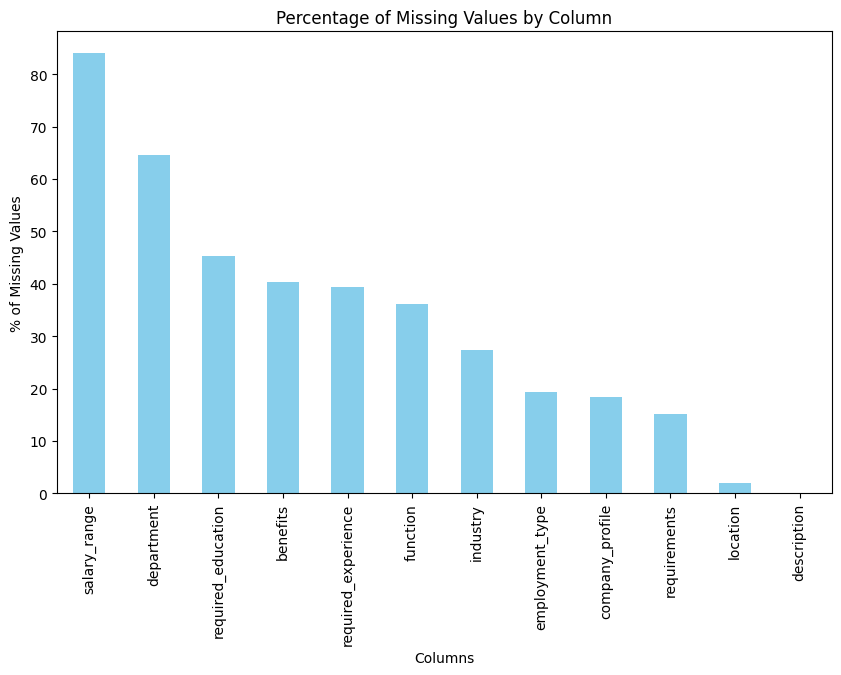

In [ ]:
# Count and display percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% of Missing Values')
plt.xlabel('Columns')
plt.show()

from the bar chart the fields  that is incomplete(missing values) are:


*       Salary range
*   Benefits
* Department



    


###Fill Missing Text Fields
This replaces all missing values in the listed text-based columns with the word "Missing".

In [ ]:
# For text columns, replace missing values with Missing
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna('Missing')

Fills missing values in various categorical fields with labels like 'Unknown' or 'Not Specified'.

In [ ]:
# For other categorical columns, replace missing values with relevant placeholders
df['location'].fillna('Unknown', inplace=True)
df['department'].fillna('Unknown', inplace=True)
df['salary_range'].fillna('Not Specified', inplace=True)
df['employment_type'].fillna('Not Specified', inplace=True)
df['required_experience'].fillna('Not Specified', inplace=True)
df['required_education'].fillna('Not Specified', inplace=True)
df['function'].fillna('Not Specified', inplace=True)

###Class Distribution Check

In [ ]:
print("Fraudulent Value Counts:")
print(df['fraudulent'].value_counts())

Fraudulent Value Counts:
,fraudulent
,0    17014
,1      866
,Name: count, dtype: int64


* 0 = Real jobs: 17,014 postings

* 1 = Fake jobs: 866 posting

### Calculate Fraud Percentage and Print Summary

In [ ]:
# Calculate the total number of job postings
total_postings = len(df)

# Calculate the number of fraudulent postings
fraudulent_postings = df['fraudulent'].value_counts().get(1, 0)

# Calculate the percentage of fraudulent postings
fraud_percentage = (fraudulent_postings / total_postings) * 100

print(f'Total Job Postings: {total_postings}')
print(f'Number of Fraudulent Postings: {fraudulent_postings}')
print(f'Percentage of Fraudulent Postings: {fraud_percentage:.2f}%')

Total Job Postings: 17880
,Number of Fraudulent Postings: 866
,Percentage of Fraudulent Postings: 4.84%


###Visualize Fraudulent vs. Real Job Postings

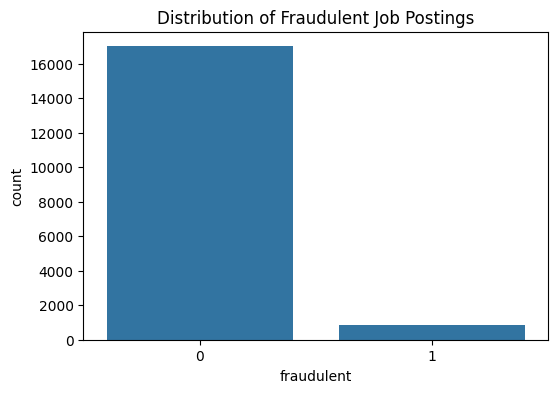

In [ ]:
# Bar plot for fraudulent (target) feature
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

A tall bar for 0 (real jobs)

A short bar for 1 (fake jobs)

###Fraudulent Postings by Function

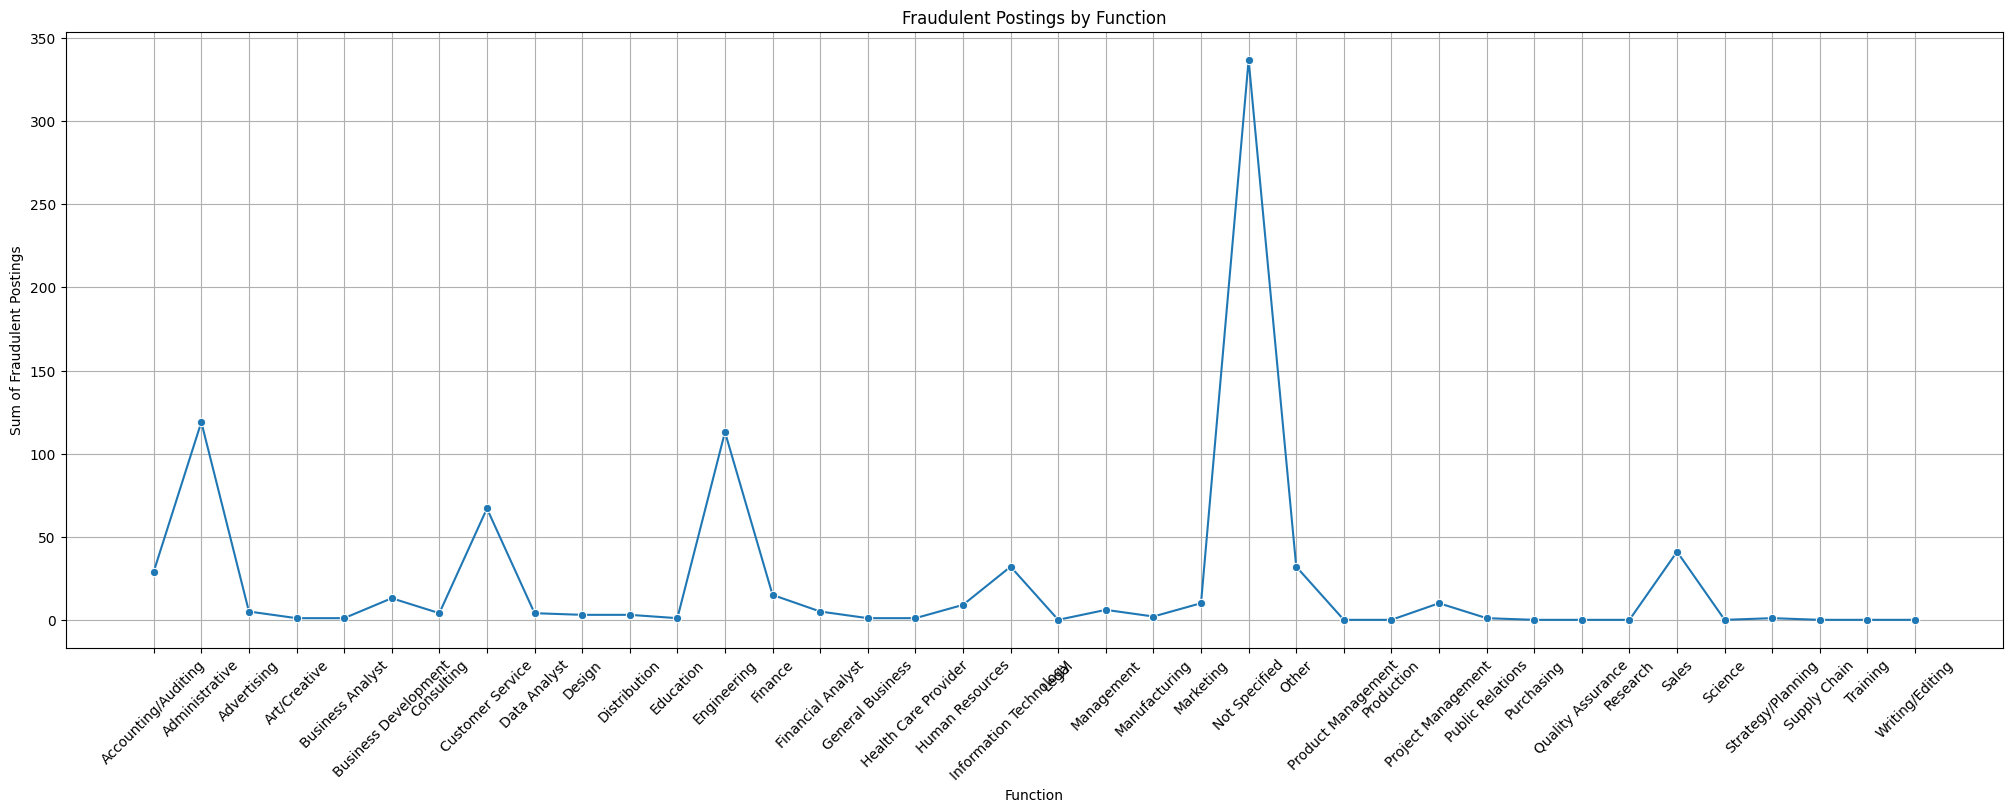

In [ ]:
# Calculate the sum of fraudulent postings by function
fraudulent_summary = df.groupby('function')['fraudulent'].sum().reset_index()

plt.figure(figsize=(25, 8))
sns.lineplot(data=fraudulent_summary, x='function', y='fraudulent', marker='o')
plt.title('Fraudulent Postings by Function')
plt.xlabel('Function')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

"Not Specified" has the highest number of fraudulent job postings — over 300.

Other notable high-fraud areas:

   * Administrative

  * Education

The lowest fraud counts appear in:

   * Marketing

   * Science

   * Strategy/Planning

   * Training




1.   Most fraudulent job postings are listed as full-time positions, while the fewest are associated with temporary employment.


2.  Fraudulent job postings frequently have "Not Specified" under required experience, whereas roles that require executive-level or internship experience are the least likely to be fraudulent.


3.  Job ads that do not specify educational requirements show the highest likelihood of being fake. In contrast, listings requiring vocational or doctorate-level education are least likely to be fraudulent.






> The most Fraud Job Application aren't Specified its Function, the Marketing Sector/ Field have the least opportunity to be Fraud

# **Cross-Domain**

### Cross-Domain Preparation & Sampling

In [ ]:
# Step 1: Clean 'industry' column
df['industry'] = df['industry'].fillna('Other')
df['industry'] = df['industry'].apply(lambda x: 'Information Technology' if x.strip() == 'Information Technology' else 'Other')


Replaces missing industries with "Other".

Keeps only "Information Technology" as a domain label; everything else becomes "Other".

###Sample 800 Real + 800 Fake Job Posts

In [ ]:
# Step 2: Sample 800 real and 800 fake
real_df = df[df['fraudulent'] == 0].sample(n=800, random_state=42)
fake_df = df[df['fraudulent'] == 1].sample(n=800, random_state=42)
balanced_df = pd.concat([real_df, fake_df]).reset_index(drop=True)


we  randomly select 800 real and 800 fake job ads to create a balanced dataset.

###Before & After Sampling Bar Charts

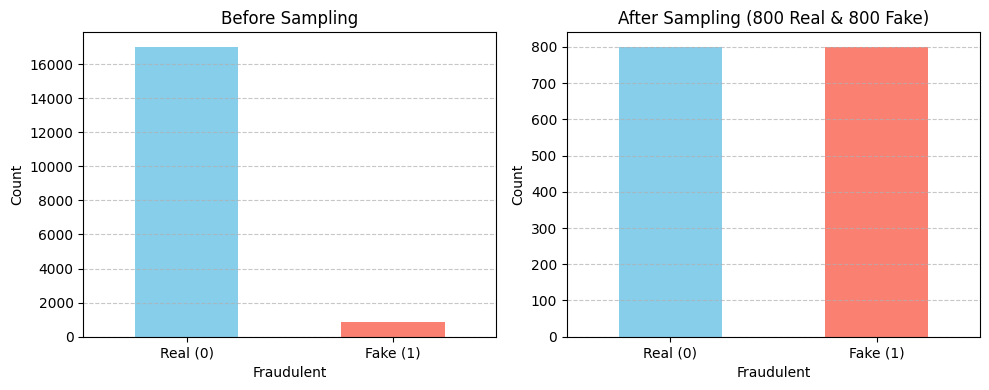

In [ ]:

# Count before sampling
before_sampling_counts = df['fraudulent'].value_counts()

# Sample 800 real (fraudulent == 0) and 800 fake (fraudulent == 1)
real_df = df[df['fraudulent'] == 0].sample(n=800, random_state=42)
fake_df = df[df['fraudulent'] == 1].sample(n=800, random_state=42)

# Combine into one balanced dataset
balanced_df = pd.concat([real_df, fake_df]).reset_index(drop=True)

# Count after sampling
after_sampling_counts = balanced_df['fraudulent'].value_counts()

# Plot before and after sampling
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Before Sampling
before_sampling_counts.plot(kind='bar', color=['skyblue', 'salmon'], ax=ax[0])
ax[0].set_title("Before Sampling")
ax[0].set_xlabel("Fraudulent")
ax[0].set_ylabel("Count")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Real (0)', 'Fake (1)'], rotation=0)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# After Sampling
after_sampling_counts.plot(kind='bar', color=['skyblue', 'salmon'], ax=ax[1])
ax[1].set_title("After Sampling (800 Real & 800 Fake)")
ax[1].set_xlabel("Fraudulent")
ax[1].set_ylabel("Count")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Real (0)', 'Fake (1)'], rotation=0)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Sampled 800 real job postings (fraudulent == 0) and 800 fake job postings (fraudulent == 1) to create a balanced dataset.

###Feature & Label Extraction

In [ ]:
# Step 3: Feature + Label split
X = balanced_df['description']
y = balanced_df['fraudulent']
domains = balanced_df['industry']


X: The job descriptions (text)

y: Labels (0 for real, 1 for fake)

domains: Which industry the post belongs to — useful for cross-domain evaluation later

###Train/Test Split(Stratified Split)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming balanced_df is your DataFrame with features and labels
X = balanced_df['description']  # Features
y = balanced_df['fraudulent']    # Labels

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Stratify based on the labels
)

# Display the shape of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1280 samples
,Testing set size: 320 samples


To perform a stratified split for circular learning based on the fraudulent label, you can use the train_test_split function from sklearn.model_selection. This ensures that the distribution of the target variable (fraudulent or not) is maintained in both the training and testing datasets.

## Model Training & Prediction

Converts job descriptions to numbers using TF-IDF.

Trains a Random Forest classifier to learn patterns in the text.

_____________________________________________________________________________________

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Create a pipeline with TF-IDF Vectorizer and Random Forest Classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=42))])

###Make Predictions

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

###Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Classification Report:
,               precision    recall  f1-score   support
,
,           0       0.86      0.91      0.88       160
,           1       0.90      0.85      0.87       160
,
,    accuracy                           0.88       320
,   macro avg       0.88      0.88      0.88       320
,weighted avg       0.88      0.88      0.88       320
,
,Confusion Matrix:
, [[145  15]
, [ 24 136]]


145 real jobs were correctly predicted as real.

139 fake jobs were correctly flagged.

15 real jobs were wrongly flagged as fake (false positive).

21 fake jobs were missed (false negative).


#Integrating BERT for Fake Job Detection


we were using a basic model (like Random Forest + TF-IDF), which was working decently but had limits:

   * It couldn't understand context or sentence meaning

   * we wanted to make sure the model wasn't overfitting

   * we wanted better generalization across job types/domains

So, we test it with BERT — a transformer-based model that understands language much more deeply.

In [ ]:
!pip install transformers
!pip install datasets


,Requirement already satisfied: filelock in /usr/local/lib/python3.11/dist-packages (from transformers) (3.18.0)
,Requirement already satisfied: huggingface-hub<1.0,>=0.30.0 in /usr/local/lib/python3.11/dist-packages (from transformers) (0.30.2)
,Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.11/dist-packages (from transformers) (2.0.2)
,Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.11/dist-packages (from transformers) (24.2)
,Requirement already satisfied: pyyaml>=5.1 in /usr/local/lib/python3.11/dist-packages (from transformers) (6.0.2)
,Requirement already satisfied: regex!=2019.12.17 in /usr/local/lib/python3.11/dist-packages (from transformers) (2024.11.6)
,Requirement already satisfied: requests in /usr/local/lib/python3.11/dist-packages (from transformers) (2.32.3)
,Requirement already satisfied: tokenizers<0.22,>=0.21 in /usr/local/lib/python3.11/dist-packages (from transformers) (0.21.1)
,Requirement already satisfied: safetenso

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures


from transformers import create_optimizer


###Prepare the Dataset

In [ ]:
df = balanced_df.copy()
df['label'] = df['fraudulent']  # 0 = real, 1 = fake
df = df[['description', 'label']]  # Use only relevant columns


###Train-Test Split

In [ ]:
train, test = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)


###Load BERT Tokenizer and Model

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
,WARNING:huggingface_hub.file_download:Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.
,
,Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
,You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###Convert Text to BERT Format

In [ ]:
def convert_data(df):
    return df.apply(lambda x: InputExample(guid=None, text_a=x['description'], text_b=None, label=int(x['label'])), axis=1)

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=256):
    features = []
    for e in examples:
        inputs = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_token_type_ids=False
        )
        features.append(InputFeatures(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            label=e.label
        ))

    def gen():
        for f in features:
            yield ({
                'input_ids': f.input_ids,
                'attention_mask': f.attention_mask
            }, f.label)

    return tf.data.Dataset.from_generator(
        gen,
        output_signature=(
            {
                'input_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32),
                'attention_mask': tf.TensorSpec(shape=(None,), dtype=tf.int32)
            },
            tf.TensorSpec(shape=(), dtype=tf.int64)
        )
    )

train_examples = convert_data(train)
test_examples = convert_data(test)

train_dataset = convert_examples_to_tf_dataset(train_examples, tokenizer).shuffle(100).batch(16).repeat(2)
test_dataset = convert_examples_to_tf_dataset(test_examples, tokenizer).batch(16)


###Create Optimizer for BERT

In [ ]:
batch_size = 16
epochs = 3
steps_per_epoch = len(train) // batch_size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=num_train_steps
)


###Compile and Train the Mode

In [ ]:
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
bert_model.fit(train_dataset, epochs=5, validation_data=test_dataset)


Epoch 1/5
,    147/Unknown - 7198s 49s/step - loss: 0.5282 - accuracy: 0.7266

###Evaluate the Model

In [ ]:
loss, accuracy = bert_model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.2f}")


20/20 [==============================] - 353s 18s/step - loss: 0.3398 - accuracy: 0.8531
,Test Accuracy: 0.85


Classification Report:
,               precision    recall  f1-score   support
,
,           0     0.8580    0.9062    0.8815       160
,           1     0.9007    0.8500    0.8746       160
,
,    accuracy                         0.8781       320
,   macro avg     0.8793    0.8781    0.8780       320
,weighted avg     0.8793    0.8781    0.8780       320
,
,Confusion Matrix:
, [[145  15]
, [ 24 136]]


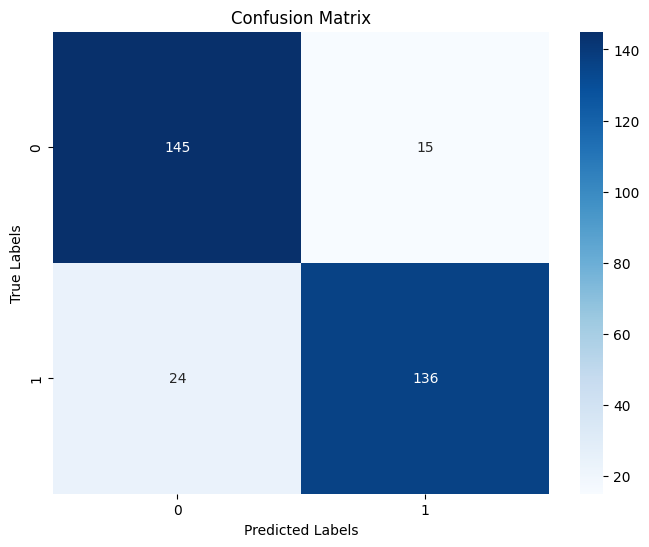

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already available (either as label indices or label names)

# Print classification report
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Generate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
